In [1]:
import wordle_data
import pandas as pd
import numpy as np
from importlib import reload 
import guesser
import game
import random

In [16]:
# importing data
history = pd.read_csv('wordle_answer_history.csv',index_col='No.').sort_index() # https://game8.co/games/Wordle/archives/369779
history.columns = [x.lower() for x in history.columns]
history.date = history.date.apply(pd.to_datetime)

In [17]:
# adding word frequency score
word_frequency = wordle_data.import_wordle_data()
history = history.merge(word_frequency[['word_frequency_rank']],left_on='answer',right_index=True,how='left') # adding word frequency score
history.word_frequency_rank = history.word_frequency_rank.apply(lambda x: np.round(x,1))

<AxesSubplot:xlabel='No.'>

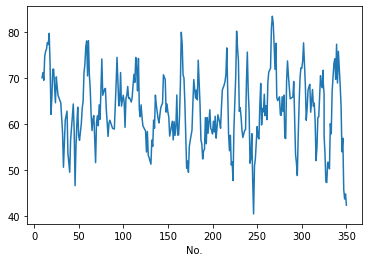

In [36]:
history['word_frequency_rank'].dropna().rolling(7).mean().plot()
# try plotting distribution over time

<AxesSubplot:xlabel='No.'>

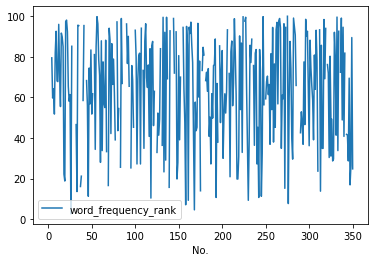

In [23]:
# to do: lagging average (using pd.shift)
history[['word_frequency_rank']].plot()